# 1. Importing Data from Flat Files
**Practice using pandas to get just the data you want from flat files, learn how to wrangle data types and handle errors, and look into some U.S. tax data along the way.**

## Introduction to flat files
In this course, we'll focus on ingesting data, a fundamental step in any data science project -- after all, you can't analyze what you can't access. Along the way, you'll learn some techniques to clean messy data.

### pandas
To do this, we'll use the Python library `pandas`. pandas was originally developed by Wes McKinney in 2008 for financial quantitative analysis, but today it has a large development community and is used in many disciplines. pandas makes it easy to load and manipulate data, and it integrates with loads of analysis and visualization libraries.

### Data Frames
Central to `pandas` is the **data frame**. Data frames are two-dimensional data structures.

This means they have columns, typically labeled with variable names and rows, which also have labels, known as an index in pandas. The default index is the row number, but you can specify a column as the index, and many types of data can be used. While you can create data frames by hand, you'll usually want to load existing data. Pandas handles many data formats, but let's start with a basic one: flat files.

### Flat Files
Flat files are **simple**, making them popular for storing and sharing data. They can be exported from database management systems and spreadsheet applications, and many online data portals provide flat file downloads. In a flat file, data is stored as **plain text**, with no formatting like colors or bold type. Each line in the file represents **one row**, with column values separated by a chosen character called a **delimiter**. Usually, the delimiter is a comma, and such files are called **CSVs**, or comma-separated values, but other characters can be used. A single pandas function loads all flat files, no matter the delimiter: read CSV.

### Loading CSVs
Let's import some tax data published as a CSV by the Internal Revenue Service, the U.S. government's tax collection agency. This file has information about household composition and income by ZIP code, making it useful for social and economic analyses. 

First, we import pandas as pd. "pd" is the conventional nickname for pandas. Then, we pass the file path as a string to pd dot read CSV, and assign the resulting data frame to a variable -- "tax data" here. Finally, we check the first few rows of the new data frame with `tax_data.head()`.

```python
import pandas as pd

tax_data = pd.read_csv('us_tax_data_2016.csv')
tax_data.head()
```

### Loading Other Flat Files
But what if that file used a different delimiter, like a tab? Rather than have different functions for every possible delimiter, pandas lets you import any flat file with read CSV and its sep keyword argument. Let's use a tab-separated version of the same tax file to see what this looks like. Again, we import pandas as pd. Then we pass the file path string to read CSV, but this time, we include another argument, sep. `\t` represents a tab. Last, we check out the data frame with the head method.
```python
tax_data = pd.read_csv('us_tax_data_2016.tsv', sep='\t)
tax_data.head()
```

## Get data from CSVs
In this exercise, you'll create a data frame from a CSV file. The United States makes available CSV files containing tax data by ZIP or postal code, allowing us to analyze income information in different parts of the country. We'll focus on a subset of the data, `vt_tax_data_2016.csv`, which has select tax statistics by ZIP code in Vermont in 2016.

To load the data, you'll need to import the `pandas` library, then read `vt_tax_data_2016.csv` and assign the resulting data frame to a variable. Then we'll have a look at the data.

- Import the `pandas` library as `pd`.
- Use `read_csv()` to load `vt_tax_data_2016.csv` and assign it to the variable `data`.
- View the first few lines of the data frame with the `head()` method. This code has been written for you.

In [3]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

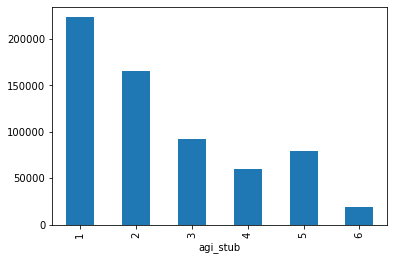

In [4]:
import matplotlib.pyplot as plt
# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

---
## Modifying flat file imports
In this lesson, we'll look at ways to limit the amount of data imported, and how to make that data easier to work with by naming columns.

### U.S. Tax Data
Checking the U.S. tax data's shape attribute, we see that it has almost 180,000 rows and 147 columns. 

```python
tax_data = pd.read_csv('us_tax_data_2016.csv')

print(tax_data.shape)
```
```
(179796, 147)
```
Unless your computer has very little memory or is running several other programs, pandas can easily handle data this size, but it is more than we need. We have some options to whittle it down.

### Limiting Columns
The first way is to choose columns to load with the `usecols` keyword argument. Usecols can take a list of either all column names or all column numbers to import. It can even accept a function to select columns, so that you can, say, import all columns starting with the letter N, but this is a more advanced technique. To focus on the number of tax returns by income band and ZIP code, we can set up a list of either the relevant column names or their numbers. We supply the file path as a string to read CSV as usual. This time, we also pass usecols the list of column names or numbers to load. 
```python
col_names = ['STATEFTIPS', 'STATE', 'zipcode', 'agi_stub', 'N1']
col_names = [0, 1, 2, 3, 4]
# Choose columns to load by name
tax_data_v1 = pd.read_csv('us_tax_data_2016.csv', usecols=col_names)
# Choose columns to load by number
tax_data_v2 = pd.read_csv('us_tax_data_2016.csv', usecols=col_nums)

print(tax_data_v1.equals(tax_data_v2))
```
```
True
```
We can check to make sure the two ways produce the same result, and they do.

### Limiting Rows
Another option is to reduce the number of rows imported with the `nrows` argument. When reading the file, we pass an integer of the maximum number of rows we want, 1000 here. 
```python
tax_data_first1000 = pd.read_csv('us_tax_data_2016.csv', nrows=1000)
print(tax_data_first1000.shape)
```
```
(1000, 147)
```

Checking the data frame's shape, we see we have exactly the number of rows we asked for.

### Limiting Rows
`nrows` is especially handy when combined with the `skiprows` argument to process a file in chunks. `skiprows` accepts a list of row numbers to skip, a function to determine whether to skip a row, or the number of rows to skip. Note that pandas automatically makes the first row imported the header, so if you skip the row with column names, you should also specify that `header=none`. 

Let's get rows 1000 to 1500. Like before, we use `nrows` to specify how many rows we want, but add that skiprows equals 1000. We skipped the header row, so we also specify there isn't one here.
```python
tax_data_next500 = pd.read_csv('us_tax_data_2016.csv',
                              nrow=500,
                              skiprows=1000,
                              header=None)
```

### Limiting Rows
Checking the head of the data frame, we see there are no column names. 
```python
print(tax_data_next500.head(1))
```
```
  0  1   2     3    4    5  6   ...  136 137  138 139 140 141 142 143
0 1 AL 35565    4   270   0 250 ... 1854 262 1978   0   0   0   0  50

[1 rows x 147 columns]
```
Let's fix this.

### Assigning Column Names
To assign column names when there aren't any, we use another read CSV argument: `names`. As you probably guessed, names takes a list of column names to use. The list **must** include a name for every column in the data -- **if you only want to rename some columns, it should be done after import**.

### Assigning Column Names
For datasets with fewer columns, you might manually build the names list with the help of a data dictionary. We want to copy a long list of column names from an existing data frame, so we'll pass the first tax subset to the list function to get the column labels. Then we read the CSV, using nrows and skiprows to get the next 500 records, setting header to none, and passing the list of column names to names. 
```python
col_names = list(tax_data_first1000)
tax_data_next500 = pd.read_csv('us_tax_data_2016.csv',
                               nrow=500,
                               skiprows=1000,
                               header=None,
                               names=col_names)

print(tax_data_next500.head(1))
```
```
  STATEFIPS STATE  zipcode  agi_stub ...  N11901 A11901 N11902 A11902
0         1    AL    35565         4 ...      50    222    210    794

[1 rows x 147 columns]
```

Now the data frame has column names.

## Import a subset of columns
The Vermont tax data contains 147 columns describing household composition, income sources, and taxes paid by ZIP code and income group. Most analyses don't need all these columns. In this exercise, you will create a data frame with fewer variables using `read_csv()`s `usecols` argument.

Let's focus on household composition to see if there are differences by geography and income level. To do this, we'll need columns on income group, ZIP code, tax return filing status (e.g., single or married), and dependents. The data uses codes for variable names, so the specific columns needed are in the instructions.

- Create a list of columns to use: `zipcode`, `agi_stub` (income group), `mars1` (number of single households), `MARS2` (number of households filing as married), and `NUMDEP` (number of dependents).
- Create a data frame from `vt_tax_data_2016.csv` that uses only the selected columns.


In [6]:
# Create list of columns to use
cols = ['zipcode', 'agi_stub', 'mars1', 'MARS2', 'NUMDEP']

# Create data frame from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols=cols)

# View counts of dependents and tax returns by income level
print(data.groupby('agi_stub').sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


## Import a file in chunks
When working with large files, it can be easier to load and process the data in pieces. Let's practice this workflow on the Vermont tax data.

The first 500 rows have been loaded as `vt_data_first500`. You'll get the next 500 rows. To do this, you'll employ several keyword arguments: `nrows` and `skiprows` to get the correct records, `header` to tell `pandas` the data does not have column names, and `names` to supply the missing column names. You'll also want to use the `list()` function to get column names from `vt_data_first500` to reuse.

- Use `nrows` and `skiprows` to make a data frame, `vt_data_next500`, with the next 500 rows.
- Set the `header` argument so that `pandas` knows there is no header row.
- Name the columns in `vt_data_next500` by supplying a list of `vt_data_first500`'s columns to the `names` argument.

In [11]:
vt_data_first500 = pd.read_csv('vt_tax_data_2016.csv', nrows=500)

# Create data frame of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows=500,
                       		  skiprows=500,
                       		  header=None,
                       		  names=list(vt_data_first500))

# View the Vermont data frames to confirm they're different
display(vt_data_first500.head())

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,...,39170,731963,40,24,0,0,12500,67761,23320,103034


In [12]:
display(vt_data_next500.head())

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,5356,2,180,120,40,0,90,250,...,170,497,0,0,0,0,50,76,130,212
1,50,VT,5356,3,80,50,40,0,40,150,...,80,460,0,0,0,0,40,142,50,148
2,50,VT,5356,4,50,0,40,0,40,110,...,50,471,0,0,0,0,0,0,30,87
3,50,VT,5356,5,80,20,50,0,60,170,...,80,2229,0,0,0,0,30,531,30,246
4,50,VT,5356,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*The techniques are used here can also be employed to explore data before committing to loading all of it, to skip rows without useful data, or to relabel all columns in a dataset.*

---
## Handling errors and missing data
So far, we've imported flat files with minor tweaks to set column names and manage the amount of data loaded. This is enough if the data is already in great shape. But what if there are issues with the data or the import?

### Common Flat File Import Issues
Common issues include incorrect column data types, which can hinder analysis, missing values indicated with custom designators, or records that pandas cannot read. Luckily, read CSV offers ways to address these issues during import, reducing the wrangling needed later on.

### Specifying Data Types
When importing data, `pandas` infers each column's data type. Sometimes, it guesses wrong. Checking data types in the tax data, we see that pandas interpreted ZIP codes as integers. 
```python
print(tax_data.dtypes)
```
```
STATEFIPS      int64
STATE         object
zipcode        int64
agi_stub       int64
N1             int64
               ...
N11902         int64
A11902         int64
Length: 147, dtype: object
```

They're more accurately modeled as strings, though -- ZIP codes are not quantities and include meaningful leading zeros.

Instead of letting pandas guess, we can set the data type of any or all columns with read CSV's dtype keyword argument. `dtype` takes a dictionary, where each key is a column name and each value is the data type that column should be. Note that non-standard data types, like pandas categories, must be passed in quotations. Here, we specify that the zipcode column should contain strings, leaving pandas to infer the other columns. Printing the new data frame's dtypes, we see that zipcode's `dtype` is "object", which is the pandas counterpart to Python strings.
```python
tax_date = pd.read_csv('us_tax_data_2016.csv', dtype={'zipcode': str})
print(tax_data.dtypes)
```
```
STATEFIPS      int64
STATE         object
zipcode       object
agi_stub       int64
N1             int64
               ...
N11902         int64
A11902         int64
Length: 147, dtype: object
```

### Customizing Missing Data Values
Missing data is another common issue. `pandas` automatically recognizes some values, like “N/A” or “null”, as missing data, enabling the use of handy data-cleaning functions. But sometimes missing values are represented in ways that pandas won't catch, such as with dummy codes. In the tax data, records were sorted so that the first few have the ZIP code 0, which is not a valid code and should be treated as missing.

We can tell pandas to consider these missing data with the `na_values` keyword argument. NA values accepts either a single value, a list of values, or a dictionary of columns and values in that column to treat as missing. Let's pass a dictionary specifying that any zeros in zipcode should be treated as missing data. Then we filter the data using the is NA method on the zipcode column to view rows with missing postal codes.
```python
tax_data = pd.read_csv('us_tax_data_2016.csv',
                       na_values={'zipcode': 0})
tax_data[tax_data.zipcode.isna()]
```

### Lines with Errors
One last issue you may face are lines that pandas just can't parse. For example, a record could have more values than there are columns, like the second record in this corrupted version of the tax data.

By default, trying to load the file results in a long error, and no data is imported.

Luckily, we can change this behavior with two arguments, error bad lines and warn bad lines. Both take Boolean, or true/false values. Setting `error_bad_lines=False` makes pandas skip bad lines and load the rest of the data, instead of throwing an error. `warn_bad_lines` tells pandas whether to display messages when unparseable lines are skipped. Let's try importing the corrupted file again, this time with `error_bad_lines=False` and `warn_bad_lines=True`. 
```python
tax_data = pd.read_csv('us_tax_data_2016_corrupt.csv',
                       error_bad_lines=False,
                       warn_bad_lines=True)
```
```
b'Skipping line 3: expected 147 fields, saw 148\n'
```

Success. A word of caution: if lines were skipped, it's worth investigating what was left out to see if there are underlying issues that should be addressed.

## Specify data types
When loading a flat file, `pandas` infers the best data type for each column. Sometimes its guesses are off, particularly for numbers that represent groups or qualities instead of quantities.

Looking at the data dictionary for `vt_tax_data_2016.csv` reveals two such columns. The `agi_stub` column contains numbers that correspond to income categories, and `zipcode` has 5-digit values that should be strings -- treating them as integers means we lose leading 0s, which are meaningful. Let's specify the correct data types with the `dtype` argument.

- Load `vt_tax_data_2016.csv` with no arguments and view the data frame's `dtypes` attribute. Note the data types of `zipcode` and `agi_stub`.

In [13]:
# Load csv with no additional arguments
data = pd.read_csv("vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


- Create a dictionary, `data_types`, specifying that `agi_stub` is `"category"` data and `zipcode` is string data.
- Reload the CSV with the `dtype` argument and the dictionary to set the correct column data types.
- View the data frame's `dtypes` attribute.

In [18]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {'agi_stub': 'category',
			  'zipcode': str}

# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype=data_types)

# Print data types of resulting frame
print(data.dtypes)

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
               ...   
A85300          int64
N11901          int64
A11901          int64
N11902          int64
A11902          int64
Length: 147, dtype: object


*Setting data types at import requires becoming familiar with the data first, but it can save effort later on. A common workflow is to load the data and explore it, then write code that sets data types at import to share with colleagues or other audiences.*

## Set custom NA values
Part of data exploration and cleaning consists of checking for missing or NA values and deciding how to account for them. This is easier when missing values are treated as their own data type. and there are `pandas` functions that specifically target such NA values. `pandas` automatically treats some values as missing, but we can pass additional NA indicators with the `na_values` argument. Here, you'll do this to ensure that invalid ZIP codes in the Vermont tax data are coded as NA.
- Create a dictionary, `null_values`, specifying that `0`s in the `zipcode` column should be considered NA values.
- Load `vt_tax_data_2016.csv`, using the `na_values` argument and the dictionary to make sure invalid ZIP codes are treated as missing.

In [15]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {'zipcode': 0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values=null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

*Now that NA values are marked as such, it's possible to use NA-specific functions to do things like count missing values, as we did here, or drop records with missing values.*

## Skip bad data
In this exercise you'll use `read_csv()` parameters to handle files with bad data, like records with more values than columns. By default, trying to import such files triggers a specific error, `pandas.io.common.CParserError`.

Some lines in the Vermont tax data here are corrupted. In order to load the good lines, we need to tell `pandas` to skip errors. We also want `pandas` to warn us when it skips a line so we know the scope of data issues.

The exercise code will try to read the file. If there is a `pandas.io.common.CParserError`, the code in the `except` block will run.

- Try to import the file `vt_tax_data_2016_corrupt.csv` without any keyword arguments.

```python
try:
  # Import the CSV without any keyword arguments
  data = pd.read_csv('vt_tax_data_2016_corrupt.csv')
  
  # View first 5 records
  print(data.head())
  
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
```
```
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
Your data contained rows that could not be parsed.
```

- Import `vt_tax_data_2016_corrupt.csv` with the `error_bad_lines` parameter set to skip bad records.

```python
try:
  # Import CSV with error_bad_lines set to skip bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                     error_bad_lines=False)
  
  # View first 5 records
  print(data.head())
  
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
```
```
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
   STATEFIPS STATE  zipcode  agi_stub      N1  ...  A85300  N11901  A11901  N11902  A11902
0         50    VT        0         1  111580  ...       0   10820    9734   88260  138337
1         50    VT        0         2   82760  ...       0   12820   20029   68760  151729
2         50    VT        0         3   46270  ...       0   10810   24499   34600   90583
3         50    VT        0         5   39530  ...       0   12500   67761   23320  103034
4         50    VT        0         6    9620  ...   20428    3900   93123    2870   39425

[5 rows x 147 columns]
```

- Update the import with the `warn_bad_lines` parameter set to issue a warning whenever a bad record is skipped.

```python
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                     error_bad_lines=False, 
                     warn_bad_lines=True)
  
  # View first 5 records
  print(data.head())
  
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
```
```
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
Skipping line 5: expected 147 fields, saw 148
Skipping line 9: expected 147 fields, saw 148
Skipping line 51: expected 147 fields, saw 148

   STATEFIPS STATE  zipcode  agi_stub      N1  ...  A85300  N11901  A11901  N11902  A11902
0         50    VT        0         1  111580  ...       0   10820    9734   88260  138337
1         50    VT        0         2   82760  ...       0   12820   20029   68760  151729
2         50    VT        0         3   46270  ...       0   10810   24499   34600   90583
3         50    VT        0         5   39530  ...       0   12500   67761   23320  103034
4         50    VT        0         6    9620  ...   20428    3900   93123    2870   39425

[5 rows x 147 columns]
```